<a href="https://colab.research.google.com/github/Vilars/Data110/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# import dataset
countries = pd.read_csv('https://raw.githubusercontent.com/Vilars/Data110/refs/heads/main/countries%20of%20the%20world_cia_kaggle.csv')
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


EDA

In [3]:
# display structure
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [4]:
# Remove commas and convert to numeric

countries_clean = ['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
    'Coastline (coast/area ratio)', 'Net migration',
    'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
    'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
    'Crops (%)', 'Other (%)', 'Birthrate', 'Deathrate',
    'Agriculture', 'Industry', 'Service']

for col in countries_clean:
    countries[col] = pd.to_numeric(countries[col].astype(str).str.replace(',', '.'), errors='coerce')



In [5]:
# statistics summary
countries.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,50.730000,29.740000,0.769000,0.906000,0.954000


Comparing region GDP

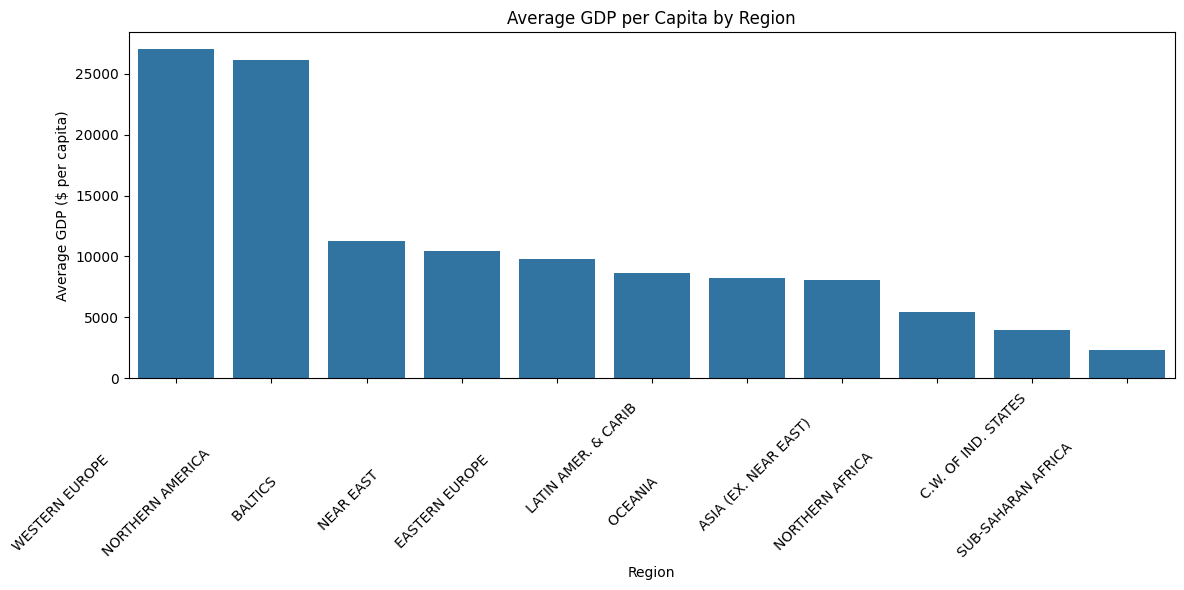

In [6]:
# Group by Region and Calculate Average GDP:
region_gdp = countries.groupby('Region')['GDP ($ per capita)'].mean().sort_values(ascending=False)

# Visualize Regional GDP using a Bar Plot:
plt.figure(figsize=(12, 6))
sns.barplot(x=region_gdp.index, y=region_gdp.values)
plt.title('Average GDP per Capita by Region')
plt.xlabel('Region')
plt.ylabel('Average GDP ($ per capita)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

There are significant differences in average GDP per capita across different regions of the world. Western Europe and North America tend to have the highest average GDP per capita, while Sub-Saharan Africa and South Asia tend to have the lowest

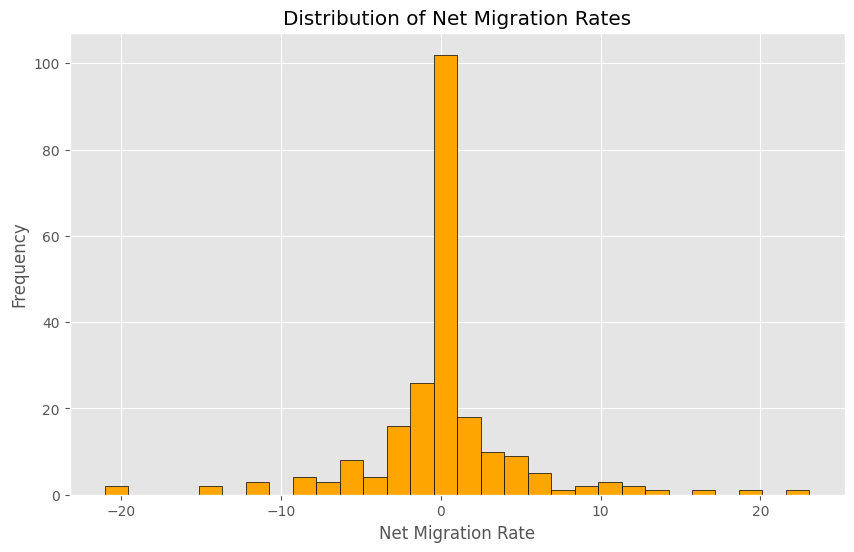

In [7]:
# Net Migration Histogram
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

plt.hist(countries['Net migration'], bins=30, color='orange', edgecolor='black')
plt.xlabel('Net Migration Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Net Migration Rates')
plt.show()

there is a variation across the countries with many clustering around zero, which implies many countries have a balanced migration rate. Fewer countries experience positive or negative migration.

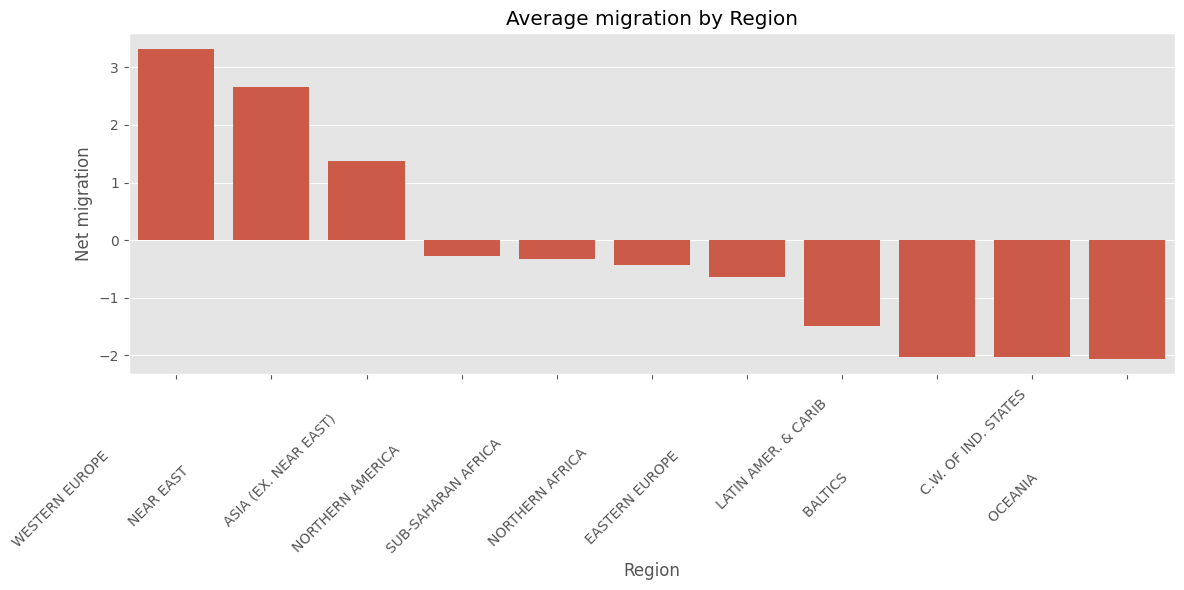

In [8]:
# Group by Region and Calculate Average migration:
region_gdp = countries.groupby('Region')['Net migration'].mean().sort_values(ascending=False)

# Visualize Regional migration using a Bar Plot:
plt.figure(figsize=(12, 6))
sns.barplot(x=region_gdp.index, y=region_gdp.values)
plt.title('Average migration by Region')
plt.xlabel('Region')
plt.ylabel('Net migration')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The differences in bar heights across regions indicate variations in net migration rates. Regions with taller bars have higher average net migration.

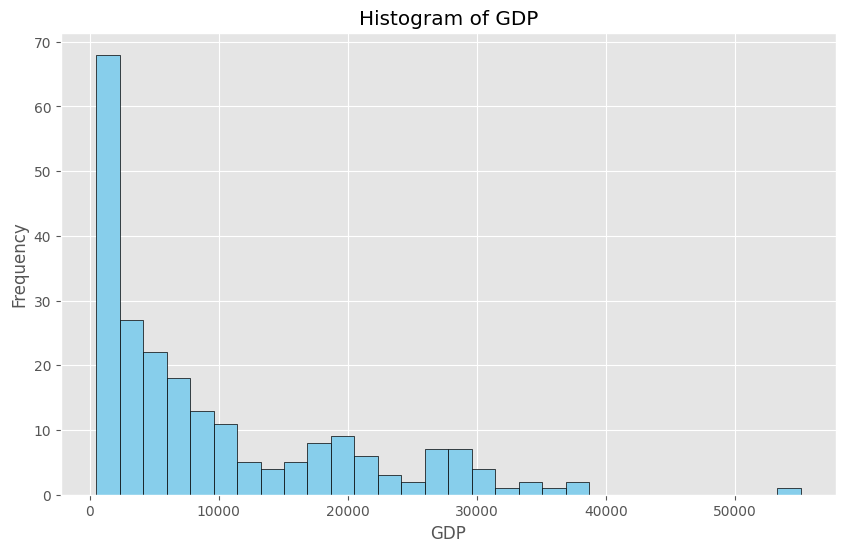

In [9]:
# Histogram
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

plt.hist(countries['GDP ($ per capita)'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.title('Histogram of GDP')
plt.show()


The distribution of GDP per capita shows significant variation, with some countries exhibiting much higher economic output per person than others. The maximum GDP per capita is observed in a few countries, suggesting economic disparity across the dataset.

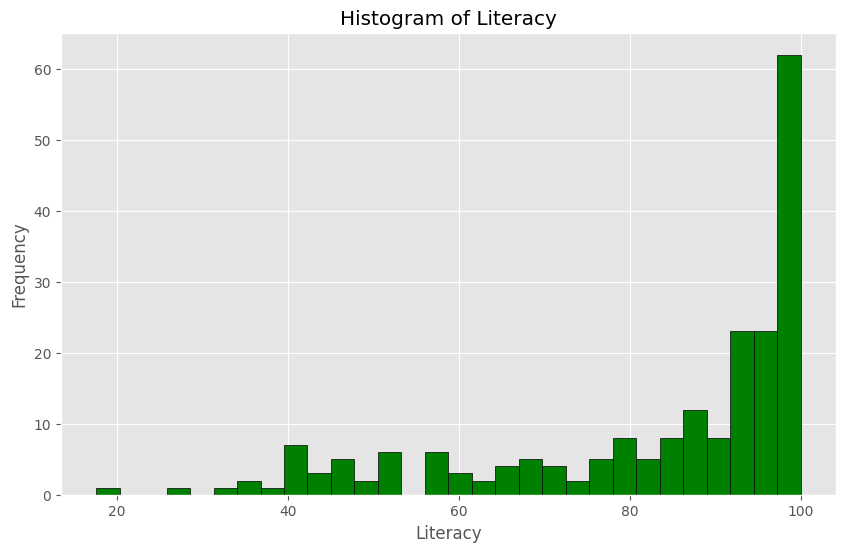

In [10]:
# Literacy Histogram
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

plt.hist(countries['Literacy (%)'], bins=30, color='green', edgecolor='black')
plt.xlabel('Literacy')
plt.ylabel('Frequency')
plt.title('Histogram of Literacy')
plt.show()

The distribution of literacy rates across countries shows that many countries have high literacy rates, with a clustering near the upper end of the scale. The average literacy rate for the dataset is relatively high.

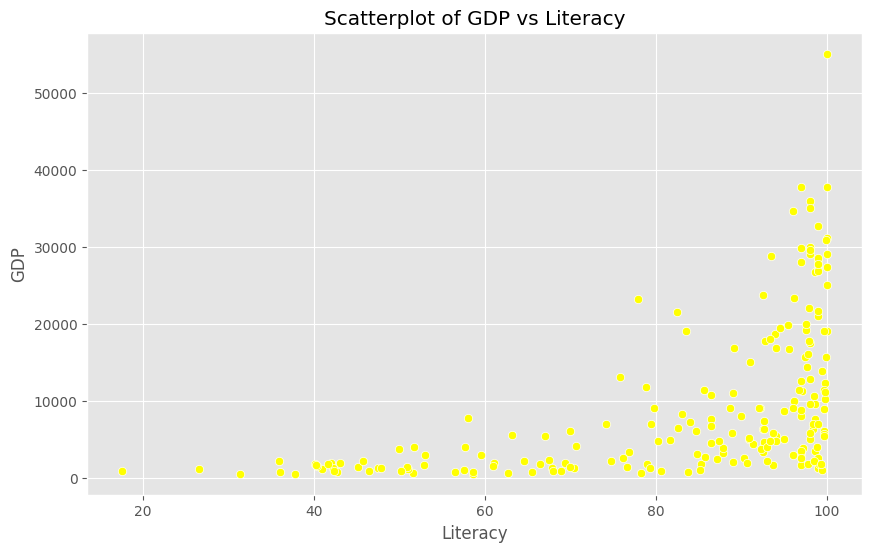

In [15]:
# style
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

# scatter plot
sns.scatterplot(x='Literacy (%)', y='GDP ($ per capita)', data=countries, color='yellow')

# title and label
plt.xlabel('Literacy')
plt.ylabel('GDP')
plt.title('Scatterplot of GDP vs Literacy')

plt.show()

 The scatter plot and linear regression analysis show a positive relationship between literacy rate and GDP per capita. Countries with higher literacy rates tend to have higher GDP per capita, suggesting that literacy could be an important factor in driving economic performance.